## Financial Loan Service

In [1]:
#import library
import pandas as pd             #membaca dan mengolah dataframe
import numpy as np              #perhitungan numerik
import matplotlib.pyplot as plt #membuat grafik
import seaborn as sns           #statistik lanjutan

In [2]:
#import dataset
df = pd.read_csv('C:/Users/RIDWAN/Downloads/archive (6)/Loan_default.csv')
print(df)

            LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0             

Deskripsi Dataset:
- LoanID : ID unik setiap peminjam.
- Age : Umur peminjam.
- Income : Pendapatan tahunan peminjam.
- LoanAmount : Jumlah uang yang dipinjam.
- CreditScore : Skor kredit peminjam. Seberapa baik peminjam membayar hutangnya di masa lalu.
- MonthsEmployed : Lama peminjam bekerja (dalam bulan).
- NumCreditLines : Jumlah jalur kredit yang dimiliki peminjam.
- InterestRate : Tingkat bunga pinjaman.
- LoanTerm : Lama pinjaman yang harus dilunasi (dalam bulan).
- DTIRatio : Rasio hutang terhadap pendapatan.
- Education : Tingkat pendidikan peminjam.
- EmploymentType : Status pekerjaan.
- MaritalStatus : Status pernikahan.
- HasMortgage : Apakah peminjam memiliki hipotek (jaminan keamanan).
- HasDependents : Apakah peminjam memiliki tanggungan.
- LoanPurpose : Tujuan pinjaman.
- HasCoSigner : Apakah peminjam memiliki jaminan.
- Default : Apakah peminjam gagal bayar (1) atau tidak (0).

## Data Quality Check

In [3]:
#cek jumlah baris dan kolom data
df.shape

(255347, 18)

In [4]:
#cek apakah ada data yang kosong
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
#cek apakah ada data yang duplikat
df.duplicated().sum()

0

In [6]:
#mengecek dtype data, apakah ada yang tidak sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Keterangan:
- Feature Default seharusnya bertipe object, karena hanya menunjukkan bagian apakah peminjam berhasil membauarkan pinjamannya ataukah tidak

In [7]:
#mengubah feature Default dari int ke object
df['Default'] = df['Default'].astype(str)

In [8]:
#tampilkan kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Keterangan:
- Semua feature sudah sesuai dengan tipe datanya

## Data Insights

In [9]:
#cek data pada df
for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(col, dtype)
    print(df[col].unique())

  print()

LoanID object
['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']

Age int64
18 69

Income int64
15000 149999

LoanAmount int64
5000 249999

CreditScore int64
300 849

MonthsEmployed int64
0 119

NumCreditLines int64
1 4

InterestRate float64
2.0 25.0

LoanTerm int64
12 60

DTIRatio float64
0.1 0.9

Education object
["Bachelor's" "Master's" 'High School' 'PhD']

EmploymentType object
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

MaritalStatus object
['Divorced' 'Married' 'Single']

HasMortgage object
['Yes' 'No']

HasDependents object
['Yes' 'No']

LoanPurpose object
['Other' 'Auto' 'Business' 'Home' 'Education']

HasCoSigner object
['Yes' 'No']

Default object
['0' '1']



In [10]:
#analisis statistik sederhana data numerik
print(df.describe())

                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000  

### 1. Age

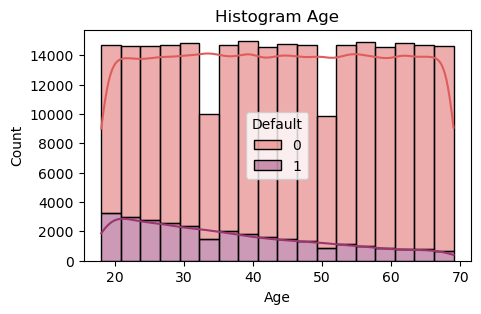

In [11]:
#histogram age
plt.figure(figsize = (5,3))
num_bins = int(1 + np.log2(len(df['Age'])))
sns.histplot(df, x='Age', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram Age')
plt.show()

Keterangan:
- Rentang usia peminjam adalah 18 sampai 69 tahun.
- Berdasarkan grafik histogram di atas, terlihat bahwa jumlah peminjam antara rentang 18 sampai 69 tahun cenderung sama yaitu sebesar (kurang lebih) 14000.
- Umur yang lebih muda cenderung lebih banyak gagal dalam pembayaran pinjaman dibandingkan dengan umur yang lebih tua.
- Jumlah kegagalan pembayaran pinjaman paling banyak terjadi pada umur 20 awal.

### 2. Income

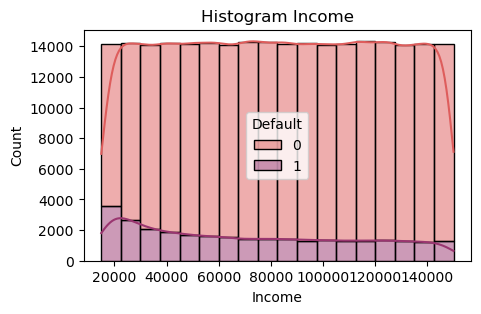

In [12]:
#histogram income
plt.figure(figsize=(5,3))
sns.histplot(df, x='Income', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram Income')
plt.show()

Keterangan:
- Rentang income dari keseluruhan peminjam adalah dari 15000 sampai 149999.
- Peminjam yang memiliki income tahunan antara 20000 sampai 40000 memiliki kecenderungan yang tinggi pada kegagalan pembayaran pinjaman. 

### 3. LoanAmount

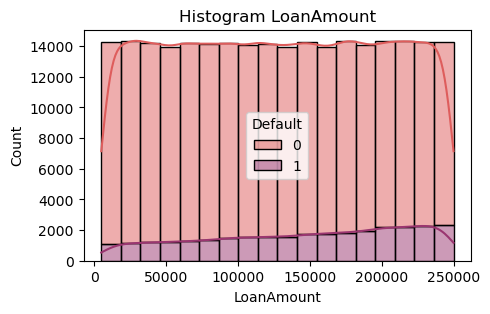

In [13]:
#histogram loanamount
plt.figure(figsize=(5,3))
sns.histplot(df, x='LoanAmount', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram LoanAmount')
plt.show()

Keterangan:
- Pinjaman paling rendah yang diajukan sebesar 5000, dan pinjaman paling tinggi yang diajukan sebesar 249999.
- Berdasarkan grafik histogram di atas, terlihat bahwa semakin tinggi biaya pinjaman yang diajukan maka semakin tinggi pula tingkat kegagalan pembayaran yang dilakukan.

### 4. CreditScore

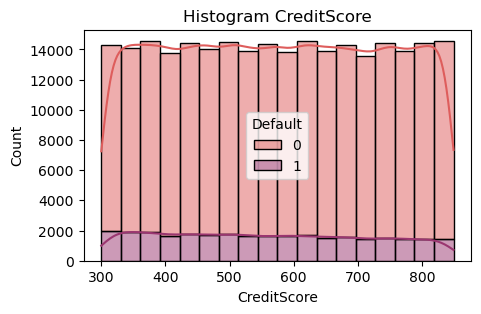

In [14]:
#histogram creditscore
plt.figure(figsize=(5,3))
sns.histplot(df, x='CreditScore', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram CreditScore')
plt.show()

Keterangan:
- Tidak ada pola unik yang ditemukan, karena untuk setiap credit score memiliki distribusi kegagalan pembayaran pinjaman yang cenderung sama, yaitu sekitar 2000.
- Tingkat credit score yang diperoleh dari keberhasilan pembayaran hutang pada transaksi sebelumnya tidak menjamin keberhasilan pembayaran pinjaman pada transaksi berikutnya.

### 5. MonthsEmployed

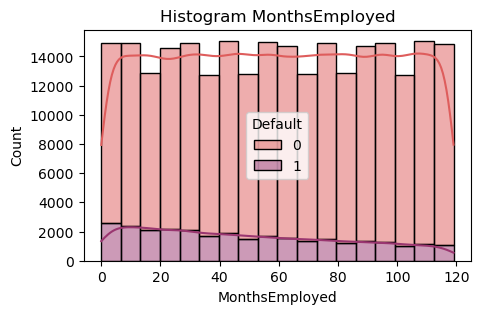

In [15]:
#histogram monthsamployed
plt.figure(figsize=(5,3))
sns.histplot(df, x='MonthsEmployed', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram MonthsEmployed')
plt.show()

Keterangan:
- Semakin lama seseorang bekerja maka semakin kecil pula tingkat kegagalan pembayaran pinjaman.

### 6. NumCreditLines

In [16]:
def percent_info_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 10)

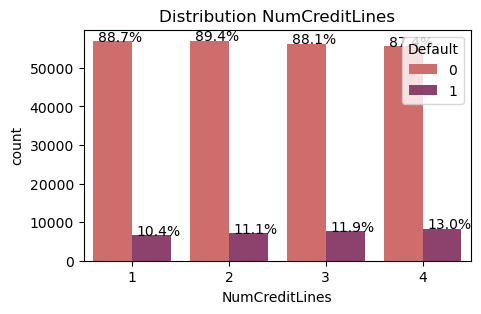

In [17]:
plt.figure(figsize=(5,3))
plt.title('Distribution NumCreditLines')
ax = sns.countplot(data=df, x='NumCreditLines', hue='Default', palette='flare')
percent_info_hue(ax,df['NumCreditLines'],4,2)

Keterangan:
- Berdasarkan grafik batang di atas, jumlah jalur kredit yang dimiliki peminjam tidak terlalu berpengaruh secara signifikan.
- Tetapi dapat dilihat bahwa peminjam yang memiliki jalur kredit lebih banyak memiliki sedikit kenaikan terhadap kegagalan pembayaran pinjaman.

### 7. InterestRate

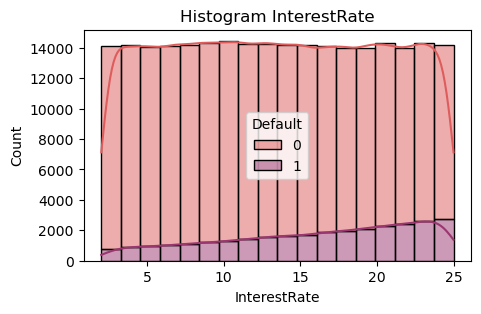

In [18]:
#histogram interestrate
plt.figure(figsize=(5,3))
sns.histplot(df, x='InterestRate', hue='Default', kde=True, bins=num_bins, 
             multiple='stack', palette='flare')
plt.title('Histogram InterestRate')
plt.show()

Keterangan:
- Rentang bunga pinjaman berdasarkan data di atas mulai dari 2,0 sampai 25,0.
- Semakin tinggi tingkat bunga pinjaman yang didapatkan semakin tinggi pula tingkat kegagalan pembayaran pinjaman. Begitupula sebaliknya.

### 8. LoanTerm

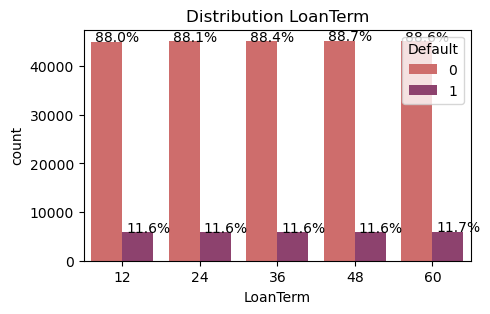

In [19]:
plt.figure(figsize=(5,3))
plt.title('Distribution LoanTerm')
ax = sns.countplot(data=df, x='LoanTerm', hue='Default', palette='flare')
percent_info_hue(ax,df['LoanTerm'],5,2)

Keterangan:
- Pada grafik di atas, terlihat bahwa rentang lama pinjaman yang diajukan antara 1-5 tahun (12-60 bulan).
- Lamanya pinjaman tidak memberikan pengaruh yang signifikan dalam keberhasilan pembayaran pinjaman.
- Setiap lama pinjaman (1-5 tahun) memiliki distribusi kegagalan pembayaran pinjaman yang sama, yaitu sebesar 11,6%.

### 9. DTIRatio

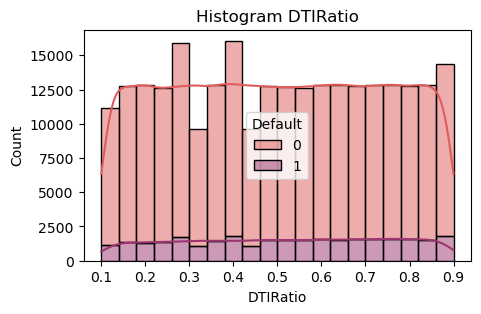

In [20]:
#histogram DTIratio
plt.figure(figsize=(5,3))
sns.histplot(df, x='DTIRatio', hue='Default', kde=True, bins=20, 
             multiple='stack', palette='flare')
plt.title('Histogram DTIRatio')
plt.show()

Keterangan:
- Tingkat DTIRatio tidak memberikan pengaruh yang signifikan terhadap tingkat kegagalan pembayaran pinjaman.
- Walaupun jika dilihat semakin tinggi DTIRatio tingkat kegagalan pembayaran pinjaman memiliki sedikit sekali peningkatan.

### 10. Education

In [21]:
def percent_info(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

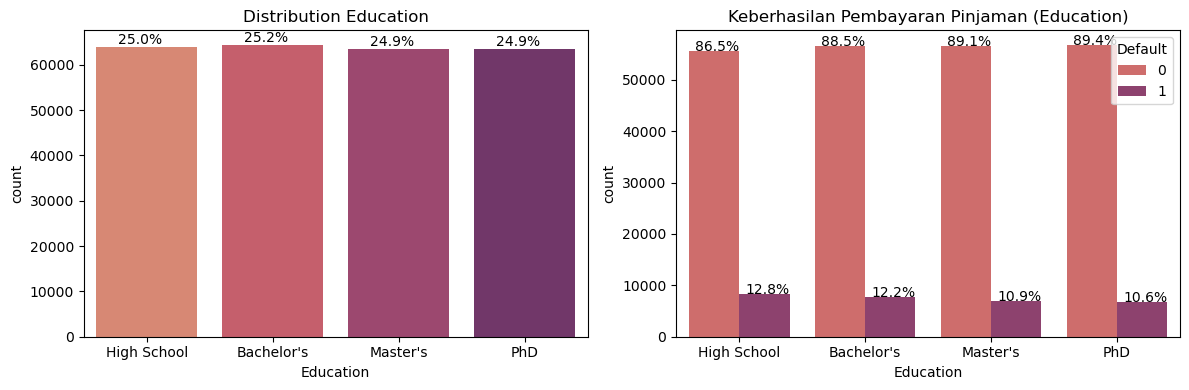

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

#distribusi education
ax1 = sns.countplot(df, x='Education', palette='flare', ax=axes[0],
                   order=["High School", "Bachelor's", "Master's", "PhD"])
ax1.set_title('Distribution Education')
percent_info(ax1, df)

#keberhasilan pembayaran pinjaman berdasarkan education
ax2 = sns.countplot(data=df, x='Education', hue='Default', palette='flare', ax=axes[1],
                   order=["High School", "Bachelor's", "Master's", "PhD"])
ax2.set_title('Keberhasilan Pembayaran Pinjaman (Education)')
percent_info_hue(ax2, df['Education'], 4, 2)

plt.tight_layout()

Keterangan:
- Berdasarkan grafik Distribution Education, terlihat bahwa masing-masing tingkat pendidikan memiliki distribusi yang sama yaitu sekitar 25%. Artinya jumlah peminjam pada data ini untuk tiap tingkat pendidikannya memiliki jumlah yang tidak jauh berbeda.
- Dari grafik Keberhasilan Pembayaran Pinjaman (Education), terlihat bahwa semakin tinggi tingkat pendidikan peminjam maka semakin tinggi pula tingkat keberhasilan pembayaran pinjaman.

### 11. EmploymentType

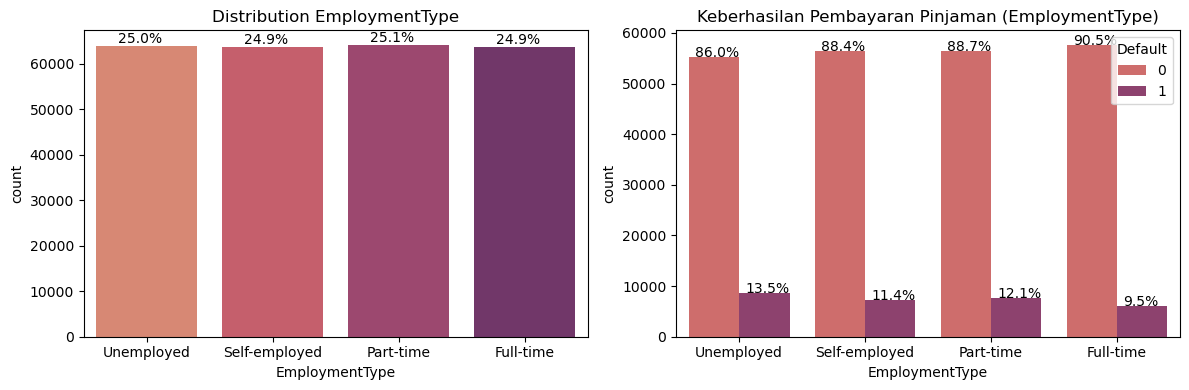

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

#distribusi employmenttype
ax1 = sns.countplot(df, x='EmploymentType', palette='flare', ax=axes[0],
                   order=["Unemployed", "Self-employed", "Part-time", "Full-time"])
ax1.set_title('Distribution EmploymentType')
percent_info(ax1, df)

#keberhasilan pembayaran pinjaman berdasarkan employmenttype
ax2 = sns.countplot(data=df, x='EmploymentType', hue='Default', palette='flare', ax=axes[1],
                   order=["Unemployed", "Self-employed", "Part-time", "Full-time"])
ax2.set_title('Keberhasilan Pembayaran Pinjaman (EmploymentType)')
percent_info_hue(ax2, df['EmploymentType'], 4, 2)

plt.tight_layout()

Keterangan:
- Berdasarkan grafik Distribution EmploymentType, terlihat bahwa masing-masing tipe pekerjaan memiliki distribusi yang hapir sama yaitu sekitar 25%.
- Dari grafik Keberhasilan Pembayaran Pinjaman (EmploymentType), terlihat bahwa tingkat kegagalan pembayaran pinjaman paling tinggi terjadi pada tipe Unemployed, yaitu sebesar 13,5%.
- Sedangkan tingkat kegagalan pembayaran pinjaman paling rendah terdapat pada tipe pekerjaan Full-Time, yaitu sebesar 9,5%.
- Dapat ditarik kesimpulan bahwa untuk jenis pekerjaan yang memiliki pemasukan yang tidak fluktuatif cenderung lebih rendah dalam kegagalan pembayaran pinjaman.

### 12. MaritalStatus

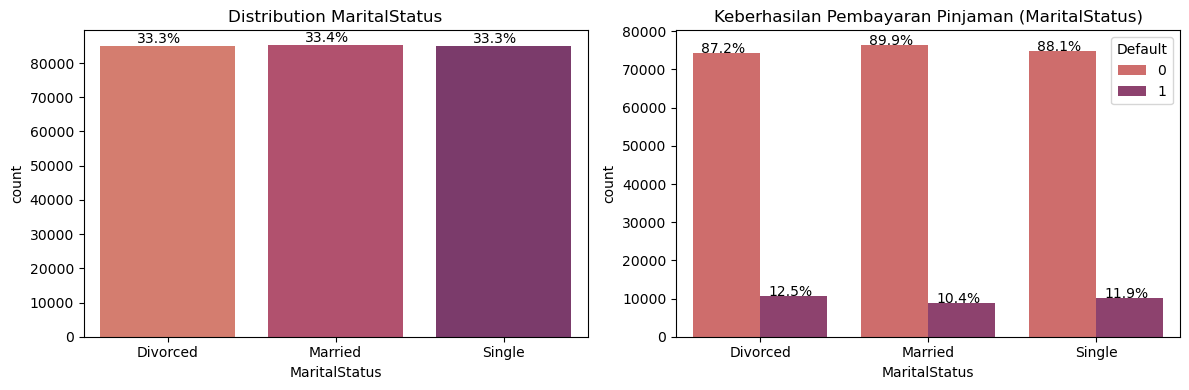

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

#distribusi MaritalStatus
ax1 = sns.countplot(df, x='MaritalStatus', palette='flare', ax=axes[0])
ax1.set_title('Distribution MaritalStatus')
percent_info(ax1, df)

#keberhasilan pembayaran pinjaman berdasarkan MaritalStatus
ax2 = sns.countplot(data=df, x='MaritalStatus', hue='Default', palette='flare', ax=axes[1])
ax2.set_title('Keberhasilan Pembayaran Pinjaman (MaritalStatus)')
percent_info_hue(ax2, df['MaritalStatus'], 3, 2)

plt.tight_layout()

Keterangan:
- Dalam dataset ini, distribusi status pernikahan masing-masing memiliki jumlah yang hampir sama yaitu sekitar 33%.
- Dalam grafik Keberhasilan Pembayaran Pinjaman (MaritalStatus), terlihat bahwa tingkat kegagalan pembayaran pinjaman paling tinggi terjadi pada peminjam yang memiliki status pernikahan Divorced (12,5%), kemudian Single (11,9%), dan yang terakhir Married (10,4%).

### 13. HasMortgage

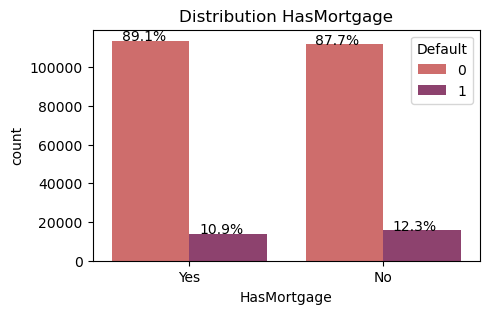

In [25]:
plt.figure(figsize=(5,3))
plt.title('Distribution HasMortgage')
ax = sns.countplot(data=df, x='HasMortgage', hue='Default', palette='flare')
percent_info_hue(ax,df['HasMortgage'],2,2)

Keterangan:
- Orang yang memiliki jaminan keamanan memiliki tingkat kegagalan pembayaran pinjaman yang sedikit lebih rendah dibandingkan dengan yang tidak memiliki jaminan keamanan kepada pihak pemberi.

### 14. HasDependents

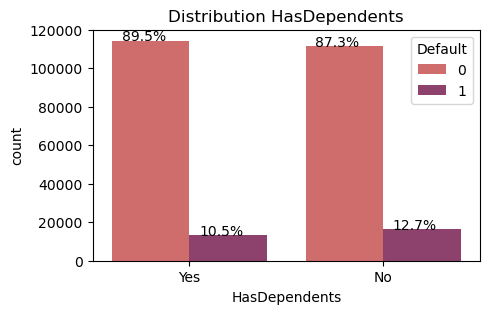

In [26]:
plt.figure(figsize=(5,3))
plt.title('Distribution HasDependents')
ax = sns.countplot(data=df, x='HasDependents', hue='Default', palette='flare')
percent_info_hue(ax,df['HasDependents'],2,2)

Keterangan:
- Orang yang memiliki tanggungan memiliki tingkat kegagalan pembayaran pinjaman lebih rendah dibandingkan dengan yang tidak memiliki tanggungan.

### 15. LoanPurpose

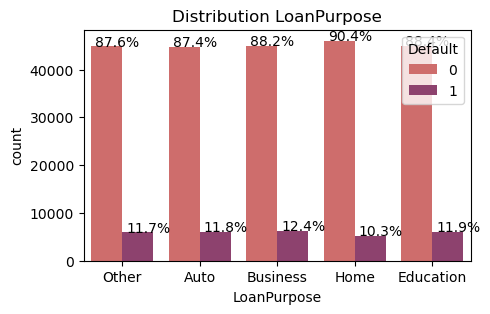

In [27]:
plt.figure(figsize=(5,3))
plt.title('Distribution LoanPurpose')
ax = sns.countplot(data=df, x='LoanPurpose', hue='Default', palette='flare')
percent_info_hue(ax,df['LoanPurpose'],5,2)

Keterangan:
- Terlihat bahwa distribusi kegagalan pembayaran pinjaman paling banyak terjadi pada tujuan bisnis (12,4%) dan yang terendah adalah untuk keperluan rumah (10,3%).
- Untuk keperluan Auto, Pendidikan, ataupun Lainnya (Other) memiliki distribusi kegagalan pembayaran pinjaman yang cenderung sama yaitu sekitar 11%.

### 16. HasCoSigner

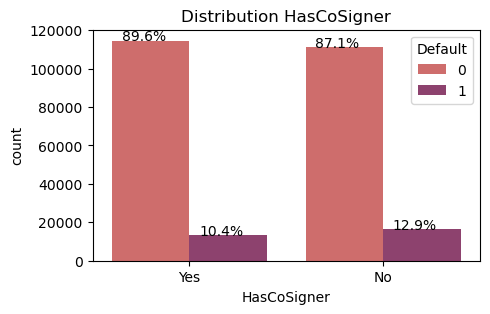

In [28]:
plt.figure(figsize=(5,3))
plt.title('Distribution HasCoSigner')
ax = sns.countplot(data=df, x='HasCoSigner', hue='Default', palette='flare')
percent_info_hue(ax,df['HasCoSigner'],2,2)

Keterangan:
- Orang yang melakukan pinjaman tanpa memiliki jaminan memiliki tingkat kegagalan pembayaran pinjaman lebih tinggi dibandingkan dengan yang memiliki jaminan, yaitu sebesar 12,9%.

## Modelling Machine Learning

In [29]:
#import library untuk machine learning
from sklearn.model_selection import train_test_split   #untuk data splitting
from sklearn.feature_extraction import DictVectorizer  #untuk pemrosesan one hot encoding

### Data Splitting

Dataset akan dibagi menjadi 3 bagian, yaitu:
1. Data Train      : digunakan untuk mempelajari pola yang ada pada dataset
2. Data Validation : digunakan untuk mengevaluasi hasil training dari data train
3. Data Test       : digunakan untuk menguji model yang sudah dibuat

- Pembagian masing-masing dataset yaitu Data Train (60%), Data Validation (20%), dan Data Test (20%).
- Jumlah Data Train harus lebih banyak daripada Data Validation dan Data Test, agar mesin dapat lebih banyak mempelajari pola yang ada.
- Selain itu, dalam pembuatan model machine learning, data harus di split terlebih dahulu sebelum memasuki data preprocessing agar tidak terjadi data leakage (kebocoran data).

In [30]:
#splitting
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [31]:
#cek jumlah data
df_train.shape, df_val.shape, df_test.shape

((153207, 18), (51070, 18), (51070, 18))

### Preprocessing

In [32]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Keterangan:
- Untuk feature LoanID tidak akan digunakan, karena feature tersebut hanya sebagai pembeda saja antar transaksi peminjam dan tidak ada informasi yang dapat diambil.
- Terdapat tipe data numerik (int, float) dan kategorikal (object). Masing-masing akan di proses secara terpisah.

In [33]:
#menghilangkan feature LoanID pada setiap dataset
df_train = df_train.drop('LoanID', axis=1)
df_val = df_val.drop('LoanID', axis=1)
df_test = df_test.drop('LoanID', axis=1)

In [34]:
#memisahkan feature numeric
numeric_feat = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

display(df_train[numeric_feat].head(5))
display(df_val[numeric_feat].head(5))
display(df_test[numeric_feat].head(5))

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
168841,42,69152,153082,694,6,4,6.72,48,0.11
190665,64,94739,27266,421,34,3,22.86,36,0.75
18003,20,46956,201113,314,9,3,6.28,60,0.33
109286,27,24170,67283,425,76,2,7.87,48,0.70
124092,60,89306,231407,730,114,4,20.39,12,0.60


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
166865,37,131140,178681,651,66,1,3.58,60,0.17
242089,20,53741,82912,426,1,3,8.79,24,0.28
139421,63,118158,223006,840,42,2,24.81,12,0.29
163834,61,98722,65188,800,116,1,15.89,48,0.88
52983,29,83278,96816,582,45,1,24.31,12,0.73


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
96230,27,52584,60095,767,110,3,2.10,60,0.90
73292,35,52120,110208,719,86,2,17.15,12,0.86
45552,55,97782,85908,629,26,1,18.67,12,0.42
121878,19,59024,24842,482,114,4,16.79,12,0.41
192411,46,136634,171566,477,4,2,2.81,48,0.31


In [35]:
#memisahkan feature categorical
categorical_feat = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']

display(df_train[categorical_feat].head(5))
display(df_val[categorical_feat].head(5))
display(df_test[categorical_feat].head(5))

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
168841,PhD,Part-time,Single,Yes,Yes,Home,No,0
190665,Master's,Self-employed,Single,No,Yes,Home,Yes,0
18003,High School,Self-employed,Married,No,Yes,Home,No,1
109286,High School,Self-employed,Divorced,No,No,Auto,No,1
124092,Master's,Full-time,Single,No,Yes,Other,Yes,0


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
166865,Master's,Full-time,Divorced,Yes,Yes,Business,No,0
242089,Bachelor's,Unemployed,Single,Yes,Yes,Education,No,0
139421,Bachelor's,Part-time,Single,No,Yes,Other,Yes,0
163834,High School,Self-employed,Single,No,Yes,Business,No,0
52983,Master's,Part-time,Single,Yes,Yes,Auto,No,0


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
96230,Bachelor's,Full-time,Married,No,Yes,Home,No,0
73292,PhD,Part-time,Divorced,Yes,Yes,Education,Yes,0
45552,High School,Self-employed,Divorced,Yes,Yes,Education,No,0
121878,High School,Full-time,Married,Yes,No,Education,No,0
192411,High School,Unemployed,Single,Yes,Yes,Education,No,0


Karena pada machine learning semua prosesnya dilakukan secara numerik, maka data categorical tersebut perlu diubah menjadi dalam bentuk numerik sesuai dengan jenisnya.

- Education : ordinal
- EmploymentType : nominal
- MaritalStatus : nominal
- HasMortgage : nominal
- HasDependents : nominal
- LoanPurpose : nominal
- HasCoSigner : nominal
- Default : nominal

Khusus feature Default, tidak perlu ada proses lagi karena sudah dalam bentuk numerik.

In [36]:
all_feat = numeric_feat + categorical_feat

df_train_final = df_train[all_feat]
df_val_final = df_val[all_feat]
df_test_final = df_test[all_feat]

In [37]:
#cek data education
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

Maka, High School bernilai 1, Bachelor's bernilai 2, Master's bernilai 3, dan PhD bernilai 4

In [38]:
#ubah data education menjadi numerik (ordinal)
education = {'High School':1, "Bachelor's":2, "Master's":3, 'PhD':4}

#mapping data education baru ke dalam dataset
df_train_final['Education'] = df_train_final['Education'].map(education)
df_val_final['Education'] = df_val_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [39]:
#tampilkan hasil perubahan data education
display(df_train_final[categorical_feat].head(5))
display(df_val_final[categorical_feat].head(5))
display(df_test_final[categorical_feat].head(5))

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
168841,4,Part-time,Single,Yes,Yes,Home,No,0
190665,3,Self-employed,Single,No,Yes,Home,Yes,0
18003,1,Self-employed,Married,No,Yes,Home,No,1
109286,1,Self-employed,Divorced,No,No,Auto,No,1
124092,3,Full-time,Single,No,Yes,Other,Yes,0


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
166865,3,Full-time,Divorced,Yes,Yes,Business,No,0
242089,2,Unemployed,Single,Yes,Yes,Education,No,0
139421,2,Part-time,Single,No,Yes,Other,Yes,0
163834,1,Self-employed,Single,No,Yes,Business,No,0
52983,3,Part-time,Single,Yes,Yes,Auto,No,0


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
96230,2,Full-time,Married,No,Yes,Home,No,0
73292,4,Part-time,Divorced,Yes,Yes,Education,Yes,0
45552,1,Self-employed,Divorced,Yes,Yes,Education,No,0
121878,1,Full-time,Married,Yes,No,Education,No,0
192411,1,Unemployed,Single,Yes,Yes,Education,No,0


Feature Education sudah sesuai. Selanjutnya akan di proses feature categorical jenis nominal dengan menggunakan "One Hot Encoding"

In [40]:
#inisialisasi dictionary vectorizer
dv = DictVectorizer(sparse=False)

In [41]:
#ubah dataset kedalam bentuk dictionary (records)
df_train_final_dict = df_train_final.to_dict(orient='records')
df_val_final_dict = df_val_final.to_dict(orient='records')
df_test_final_dict = df_test_final.to_dict(orient='records')

In [42]:
#cek bentuk dataset
display(df_train_final_dict[0:1])
display(df_val_final_dict[0:1])
display(df_test_final_dict[0:1])

[{'Age': 42,
  'Income': 69152,
  'LoanAmount': 153082,
  'CreditScore': 694,
  'MonthsEmployed': 6,
  'NumCreditLines': 4,
  'InterestRate': 6.72,
  'LoanTerm': 48,
  'DTIRatio': 0.11,
  'Education': 4,
  'EmploymentType': 'Part-time',
  'MaritalStatus': 'Single',
  'HasMortgage': 'Yes',
  'HasDependents': 'Yes',
  'LoanPurpose': 'Home',
  'HasCoSigner': 'No',
  'Default': '0'}]

[{'Age': 37,
  'Income': 131140,
  'LoanAmount': 178681,
  'CreditScore': 651,
  'MonthsEmployed': 66,
  'NumCreditLines': 1,
  'InterestRate': 3.58,
  'LoanTerm': 60,
  'DTIRatio': 0.17,
  'Education': 3,
  'EmploymentType': 'Full-time',
  'MaritalStatus': 'Divorced',
  'HasMortgage': 'Yes',
  'HasDependents': 'Yes',
  'LoanPurpose': 'Business',
  'HasCoSigner': 'No',
  'Default': '0'}]

[{'Age': 27,
  'Income': 52584,
  'LoanAmount': 60095,
  'CreditScore': 767,
  'MonthsEmployed': 110,
  'NumCreditLines': 3,
  'InterestRate': 2.1,
  'LoanTerm': 60,
  'DTIRatio': 0.9,
  'Education': 2,
  'EmploymentType': 'Full-time',
  'MaritalStatus': 'Married',
  'HasMortgage': 'No',
  'HasDependents': 'Yes',
  'LoanPurpose': 'Home',
  'HasCoSigner': 'No',
  'Default': '0'}]

In [43]:
#fitting & transform dataset
df_train_final_dict = dv.fit_transform(df_train_final_dict)

In [44]:
df_val_final_dict = dv.transform(df_val_final_dict)
df_test_final_dict = dv.transform(df_test_final_dict)

In [45]:
#cek bentuk dataset setelah di fitting & transform
display(df_train_final_dict)
display(df_val_final_dict)
display(df_test_final_dict)

array([[4.20e+01, 6.94e+02, 1.10e-01, ..., 1.00e+00, 6.00e+00, 4.00e+00],
       [6.40e+01, 4.21e+02, 7.50e-01, ..., 1.00e+00, 3.40e+01, 3.00e+00],
       [2.00e+01, 3.14e+02, 3.30e-01, ..., 0.00e+00, 9.00e+00, 3.00e+00],
       ...,
       [2.90e+01, 6.63e+02, 1.70e-01, ..., 0.00e+00, 8.90e+01, 3.00e+00],
       [1.80e+01, 6.01e+02, 3.60e-01, ..., 0.00e+00, 5.00e+01, 3.00e+00],
       [3.10e+01, 6.05e+02, 1.60e-01, ..., 0.00e+00, 8.70e+01, 4.00e+00]])

array([[3.70e+01, 6.51e+02, 1.70e-01, ..., 0.00e+00, 6.60e+01, 1.00e+00],
       [2.00e+01, 4.26e+02, 2.80e-01, ..., 1.00e+00, 1.00e+00, 3.00e+00],
       [6.30e+01, 8.40e+02, 2.90e-01, ..., 1.00e+00, 4.20e+01, 2.00e+00],
       ...,
       [2.00e+01, 7.59e+02, 1.80e-01, ..., 0.00e+00, 2.80e+01, 1.00e+00],
       [5.70e+01, 5.79e+02, 6.10e-01, ..., 0.00e+00, 7.90e+01, 2.00e+00],
       [2.40e+01, 3.42e+02, 3.40e-01, ..., 0.00e+00, 1.00e+02, 2.00e+00]])

array([[2.70e+01, 7.67e+02, 9.00e-01, ..., 0.00e+00, 1.10e+02, 3.00e+00],
       [3.50e+01, 7.19e+02, 8.60e-01, ..., 0.00e+00, 8.60e+01, 2.00e+00],
       [5.50e+01, 6.29e+02, 4.20e-01, ..., 0.00e+00, 2.60e+01, 1.00e+00],
       ...,
       [3.80e+01, 5.07e+02, 2.20e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.20e+01, 3.53e+02, 4.00e-01, ..., 1.00e+00, 7.10e+01, 4.00e+00],
       [6.40e+01, 5.09e+02, 7.50e-01, ..., 0.00e+00, 4.50e+01, 4.00e+00]])

In [46]:
#ubah dataset menjadi bentuk dataframe
feature_name = dv.get_feature_names_out()

df_train_final = pd.DataFrame(df_train_final_dict, columns=feature_name)
df_val_final = pd.DataFrame(df_val_final_dict, columns=feature_name)
df_test_final = pd.DataFrame(df_test_final_dict, columns=feature_name)

In [47]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153207 entries, 0 to 153206
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           153207 non-null  float64
 1   CreditScore                   153207 non-null  float64
 2   DTIRatio                      153207 non-null  float64
 3   Default=0                     153207 non-null  float64
 4   Default=1                     153207 non-null  float64
 5   Education                     153207 non-null  float64
 6   EmploymentType=Full-time      153207 non-null  float64
 7   EmploymentType=Part-time      153207 non-null  float64
 8   EmploymentType=Self-employed  153207 non-null  float64
 9   EmploymentType=Unemployed     153207 non-null  float64
 10  HasCoSigner=No                153207 non-null  float64
 11  HasCoSigner=Yes               153207 non-null  float64
 12  HasDependents=No              153207 non-nul

In [48]:
#tampilkan dataset setelah di proses
new_categorical_feature = ['Education', 'EmploymentType=Full-time', 'EmploymentType=Part-time', 
                           'EmploymentType=Self-employed', 'EmploymentType=Unemployed', 'HasCoSigner=No', 'HasCoSigner=Yes',
                          'HasDependents=No', 'HasDependents=Yes', 'HasMortgage=No', 'HasMortgage=Yes',
                          'LoanPurpose=Auto', 'LoanPurpose=Business', 'LoanPurpose=Education', 'LoanPurpose=Home',
                          'LoanPurpose=Other', 'MaritalStatus=Divorced', 'MaritalStatus=Married', 'MaritalStatus=Single',
                          'Default=0', 'Default=1']

print(df_train_final[new_categorical_feature].head(5))
print(df_val_final[new_categorical_feature].head(5))
print(df_test_final[new_categorical_feature].head(5))

   Education  EmploymentType=Full-time  EmploymentType=Part-time  \
0        4.0                       0.0                       1.0   
1        3.0                       0.0                       0.0   
2        1.0                       0.0                       0.0   
3        1.0                       0.0                       0.0   
4        3.0                       1.0                       0.0   

   EmploymentType=Self-employed  EmploymentType=Unemployed  HasCoSigner=No  \
0                           0.0                        0.0             1.0   
1                           1.0                        0.0             0.0   
2                           1.0                        0.0             1.0   
3                           1.0                        0.0             1.0   
4                           0.0                        0.0             0.0   

   HasCoSigner=Yes  HasDependents=No  HasDependents=Yes  HasMortgage=No  ...  \
0              0.0               0.0      

Semua feature categorical sudah dalam bentuk numerik.

### Modelling

- Dalam proses pembuatan model machine learning, hal yang dibutuhkan adalah menentukan variabel X dan variabel Y. 
- Dimana X adalah variabel bebas, dan Y adalah variabel terikat (target).
- Dalam kasus ini variabel Y nya adalah feature Default

In [49]:
#inisiasi variabel X dan Y
X_train_final = df_train_final
X_val_final = df_val_final
X_test_final = df_test_final

Y_train_final = df_train.Default
Y_val_final = df_val.Default
Y_test_final = df_test.Default

### Base Model

- Karena tujuan dari analisis ini adalah untuk memprediksi apakah peminjam berhasil membayarkan pinjamannya atau tidak, maka kasus ini termasuk kedalam kasus klasifikasi.
- Dalam hal ini, akan digunakan dua model machine learning yaitu Logistic Regression dan Random Forest.
- Kedua model tersebut akan dibandingkan. Model manakah yang memiliki performa dan hasil paling baik.

#### 1. Logistic Regression

In [50]:
#import library untuk logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
#training
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_final, Y_train_final)

LogisticRegression(random_state=42)

In [52]:
#evaluation
Y_val_pred = model_lr.predict_proba(X_val_final)[:,1]
roc_auc_lr = roc_auc_score(Y_val_final, Y_val_pred).round(3)
print('Logistic Regression Result:', roc_auc_lr)

Logistic Regression Result: 0.715


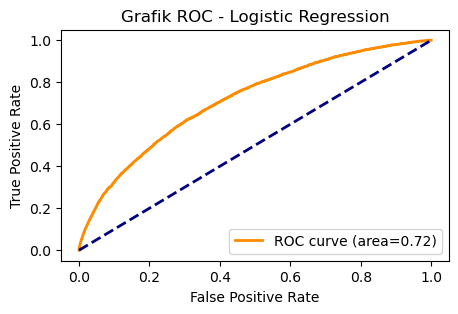

In [53]:
#tampilkan grafik roc auc
Y_val_final_int = Y_val_final.astype(int)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_val_final_int, Y_val_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5,3))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
         label=f'ROC curve (area={roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Grafik ROC - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Keterangan:
- Grafik ROC adalah sebuah grafik yang digunakan untuk mengevaluasi kinerja model klasifikasi biner.
- Semakin tinggi area yang berada di bawah kurva, maka semakin baik model tersebut untuk memprediksi.

- Dari grafik di atas, dapat dilihat bahwa area kurva yang dihasilkan adalah sebesar 0,715. Hal tersebut menunjukkan bahwa tingkat prediksi yang dihasilkan cukup baik.

Accuracy: 0.884
Precision: 0.600
Recall: 0.001
F1 Score: 0.001


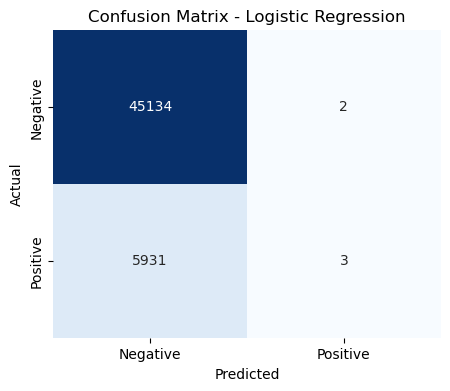

In [54]:
#tampilkan confusion matrix
#Y_val_pred_classes_int = Y_val_pred_classes.astype(int)
Y_val_pred_classes_int = (Y_val_pred >= 0.5).astype(int)

accuracy_lr = accuracy_score(Y_val_final_int, Y_val_pred_classes_int)
precision_lr = precision_score(Y_val_final_int, Y_val_pred_classes_int)
recall_lr = recall_score(Y_val_final_int, Y_val_pred_classes_int)
f1_lr = f1_score(Y_val_final_int, Y_val_pred_classes_int)

print(f'Accuracy: {accuracy_lr:.3f}')
print(f'Precision: {precision_lr:.3f}')
print(f'Recall: {recall_lr:.3f}')
print(f'F1 Score: {f1_lr:.3f}')

conf_matrix_lr = confusion_matrix(Y_val_final_int, Y_val_pred_classes_int)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Keterangan:
- Dari confusion matrix di atas dapat dilihat bahwa model memiliki nilai akurasi yang cukup tinggi yaitu sebesar 0,884 dan nilai presisi sebesar 0,6.
- Tetapi nilai recall (0,001), dan F1 score (0,001) memiliki nilai yang jauh lebih rendah.
- Artinya, model ini tidak mampu mengenali dengan baik target 1 (kegagalan dalam pembayaran pinjaman), dan cenderung mengklasifikasikan semua nilai sebagai target 0 (keberhasilan dalam pembayaran pinjaman).

Catatan:
- Kemungkinan disebabkan ketidakseimbangan data target 0 dan 1,
- atapun kurangnya fitur yang relevan untuk membedakan kedua target tersebut.

#### 2. Random Forest

In [55]:
#import library untuk random forest
from sklearn.ensemble import RandomForestClassifier

In [56]:
#training
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_final, Y_train_final)

RandomForestClassifier(random_state=42)

In [57]:
#evaluation
Y_val_pred = model_rf.predict_proba(X_val_final)[:,1]
roc_auc_rf = roc_auc_score(Y_val_final, Y_val_pred).round(3)
print('RandomForest ROCAUC Result:' , roc_auc_rf)

RandomForest ROCAUC Result: 1.0


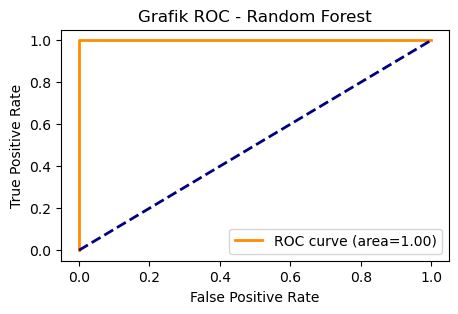

In [58]:
#tampilkan grafik roc auc
Y_val_final_int = Y_val_final.astype(int)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_val_final_int, Y_val_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5,3))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, 
         label=f'ROC curve (area={roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Grafik ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

Keterangan:
- Grafik ROC diatas menampilkan hasil yang sempurna yaitu 1,0.
- Artinya model Random Forest memiliki kinerja yang sangat baik, sehingga prediksi yang dihasilkan sangat akurat.

RandomForest Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


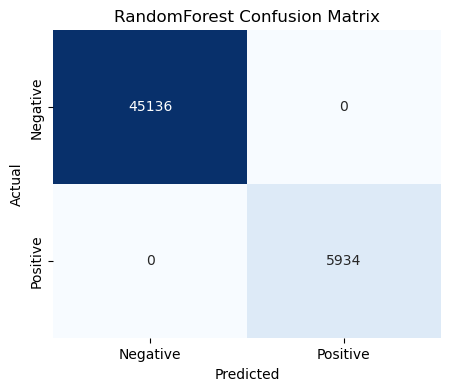

In [59]:
threshold_rf = 0.5
Y_val_pred_rf_classes = (Y_val_pred >= threshold_rf).astype(int)

# Calculate accuracy, precision, recall, and F1-score for Random Forest
accuracy_rf = accuracy_score(Y_val_final_int, Y_val_pred_rf_classes)
precision_rf = precision_score(Y_val_final_int, Y_val_pred_rf_classes)
recall_rf = recall_score(Y_val_final_int, Y_val_pred_rf_classes)
f1_rf = f1_score(Y_val_final_int, Y_val_pred_rf_classes)

# Display metrics for Random Forest
print(f'RandomForest Accuracy: {accuracy_rf:.3f}')
print(f'Precision: {precision_rf:.3f}')
print(f'Recall: {recall_rf:.3f}')
print(f'F1 Score: {f1_rf:.3f}')

# Display confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(Y_val_final_int, Y_val_pred_rf_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()

Keterangan:
- Dapat dilihat bahwa semua nilai confusion matrix (accuracy, precision, recall, & F1 score) memiliki nilai yang sempurna.
- Hal ini menunjukkan bahwa model tersebut tidak mengalami kesalahan dalam klasifikasi target.

### Testing

Proses ini dilakukan untuk menguji kestabilan dari performa model yang sudah dibuat.

In [60]:
#inisiasi dataset full train
X_full_train_final = pd.concat([X_train_final, X_val_final])
Y_full_train_final = pd.concat([Y_train_final, Y_val_final])

#### 1. Testing Model Logistic Regression

In [61]:
#inisiasi model full train
model_lr_final = LogisticRegression(random_state=42)
model_lr_final.fit(X_full_train_final, Y_full_train_final)

C:\Users\RIDWAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [62]:
#testing
Y_test_pred = model_lr_final.predict_proba(X_test_final)[:,1]
print('Logistic Regression Result:' , roc_auc_score(Y_test_final, Y_test_pred).round(3))

Logistic Regression Result: 0.738


Keterangan:
- Performa model Logistic Regression mengalami kenaikan, dari yang hasil training sebesar 0,715 , dan kini setelah di testing sebesar 0,738. 

#### 2. Testing Model Random Forest

In [63]:
#inisiasi model full train
model_rf_final = RandomForestClassifier(random_state=42)
model_rf_final.fit(X_full_train_final, Y_full_train_final)

RandomForestClassifier(random_state=42)

In [64]:
#testing
Y_test_pred = model_rf_final.predict_proba(X_test_final)[:,1]
print('Logistic Regression Result:' , roc_auc_score(Y_test_final, Y_test_pred).round(3))

Logistic Regression Result: 1.0


Keterangan:
- Performa model Random Forest masih stabil. Dilihat dari hasil saat training dan testing masih memiliki hasil yang sama.